# Konlpy.twitter를 활용한 단어빈도분석 및 Wordcloud

> ## 1) 한글 폰트 설치

- 나눔폰트 설치

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


- 설치 확인

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/tr

In [ ]:
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


- 적용됐는지 확인

Text(0.5, 1.0, '안녕')

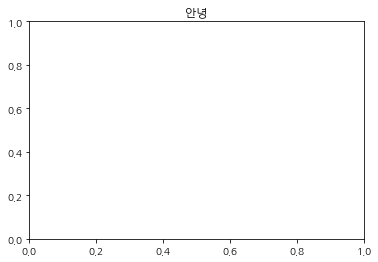

In [ ]:
plt.title('안녕')

# 오류가 안뜨는걸로 봐서 적용은 된 것 같은데... 이상하다 뭐지
# 런타임 다시 시작해주니까 됐다

# 맨 처음 설치 후 런타임을 다시 시작해주어야 적용이 되는 듯

> ## 2) Konlpy와 wordcloud 설치

- konlpy, wordcloud 설치

In [ ]:
!pip install konlpy wordcloud

     |████████████████████████████████| 19.4MB 38.9MB/s 
     |████████████████████████████████| 460kB 38.8MB/s 
     |████████████████████████████████| 92kB 8.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


- 텍스트파일 불러오기
  - one_off_conversation_happy_for_konlpy.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/one_off_conversation_angry_for_konlpy.txt'

-rw------- 1 root root 243802 Apr 12 06:01 '/content/drive/My Drive/Colab Notebooks/datasets/one_off_conversation_angry_for_konlpy.txt'


In [ ]:
from konlpy.tag import Twitter
from collections import Counter

In [ ]:
# 왼쪽 파일에 텍스트 파일 올려 놓고 불러올 수 있다.
file = open('one_off_conversation_angry_for_konlpy.txt','r')

lists = file.readlines()

file.close()

lists

['이거 외에도 갤럭시S7 시리즈도 31대나 폭발했는데 왜 기사화 안되는 걸까\n',
 '뒈지려는 놈은 살리고 왜 엉뚱한 사자를 사살하냐 쓰레기만도 못한 칠레 놈들아\n',
 '사드와 위안부는 백지화하자\n',
 '토론장에 가방 들고 간 쓰레기 년\n',
 '저런 가짜 역사교육을 받고 자란 일본인이니 향\n',
 '해먹어도 적당히 해먹어야지\n',
 '더워 죽겠다 한 남기온 이 33도면 진짜 한남 패버려야겠다\n',
 '수비 강조는 실컷 얘기하면서 다친 투수는 왜 모르쇠로 일관하냐 혹사가 아니라서 그런가\n',
 '머리 올릴 시간에 애들이 나 올려 주지 정신 나간\n',
 '최초의 탄핵 대통령이자 가장 추악하고 무식하고 무능한 대통령으로 기억되고 교과서에 기재되길 간절히 바란다\n',
 '영화티켓이 비싼 거 다 무슨 비교를\n',
 '티파니의 모국인 미국 양키 고 홈이 아님 일본으로 꺼져라\n',
 '도박하고 마약만 걸리면 범죄 왕 완성이네\n',
 '한화는 한번 쫄딱 망해봐야 된다\n',
 '미친 진짜 사이코패스구나 담화도 대개 뻥이고\n',
 '까도 까도 끝이 없네 삼성 왜 불매 안 하나 했는데 이제 하나\n',
 '과태료 500만 원은 해야지 망할 놈들아\n',
 '일본은 윗대가 리가 우리랑 비교가 안 되는 거 같다 개 후진국쌍 노무정치\n',
 '총 맞아 돼질 천하의 계 같은 달련\n',
 '더 양아치인 거는 계란 숨기고 판매하는 거\n',
 '대박이게 나라냐\n',
 '김일성 김정일 김정은 이 3대보다 한국에 더 해악이구나\n',
 '탄핵 결사반대 결사반대 결사반대\n',
 '너무 개판이라 면허 있는 사람도 다시 따야 할 판이다\n',
 '이게 이게 무슨 국제 망신이냐 부끄러워서 할 말이 없다\n',
 '필리핀은 좀 이렇게 해야지\n',
 '아예 삼성을 달라고 하지 그랬냐 순시라\n',
 '똑똑히 기억해두겠음\n',
 '부끄럽다 자국을 부끄러워하는 한국 하위 놈들이 나라 이미지 다 망치네\n',
 '저게 국정 농단이냐\n',
 '인간이 아니다 악마다\

- 형태소 분석기 나누기

In [ ]:
twitter = Twitter() 
morphs = [] 
 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('이', 'Determiner'), ('거', 'Noun'), ('외', 'Noun'), ('에도', 'Josa'), ('갤럭시', 'Noun'), ('S', 'Alpha'), ('7', 'Number'), ('시리즈', 'Noun'), ('도', 'Josa'), ('31', 'Number'), ('대나', 'Verb'), ('폭발', 'Noun'), ('했는데', 'Verb'), ('왜', 'Noun'), ('기사화', 'Noun'), ('안되는', 'Adjective'), ('걸까', 'Verb'), ('\n', 'Foreign')], [('뒈지려는', 'Verb'), ('놈', 'Noun'), ('은', 'Josa'), ('살리고', 'Verb'), ('왜', 'Noun'), ('엉뚱한', 'Adjective'), ('사자', 'Noun'), ('를', 'Josa'), ('사살', 'Noun'), ('하냐', 'Verb'), ('쓰레기', 'Noun'), ('만도', 'Josa'), ('못', 'Noun'), ('한', 'Josa'), ('칠레', 'Noun'), ('놈', 'Noun'), ('들', 'Suffix'), ('아', 'Josa'), ('\n', 'Foreign')], [('사드', 'Noun'), ('와', 'Josa'), ('위안부', 'Noun'), ('는', 'Josa'), ('백지', 'Noun'), ('화하자', 'Adjective'), ('\n', 'Foreign')], [('토론', 'Noun'), ('장', 'Suffix'), ('에', 'Josa'), ('가방', 'Noun'), ('들고', 'Verb'), ('간', 'Noun'), ('쓰레기', 'Noun'), ('년', 'Noun'), ('\n', 'Foreign')], [('저런', 'Noun'), ('가짜', 'Noun'), ('역사교육', 'Noun'), ('을', 'Josa'), ('받고', 'Verb'), ('자란', 'Verb'), ('일본인', 'Nou

- 명사만 골라내기
   - 제거 : 거, 수, 보고, 때, 더, 이, 듯, 저, 안, 게, 그, 앞, 분, 제, 요, 위, 전, 날, 알, 중, 줄, 두, 년, 명, 네, 번, 건가, 처, 비 

- 의존명사를 제거할 수 있는 Mecab Package를 쓰지 못했기 때문에 위 단어들을 일일히 제거했다. 나중에 Mcab이나 Khaiii으로 다시 시도해보자.

In [ ]:
noun_list=[] 
for sentence in morphs :
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word) and ("나" not in word) and ("거" not in word) and ("수" not in word) and ("보고" not in word) and ("때" not in word) and ("더" not in word) and ("이" not in word) and ("듯" not in word) and ("저" not in word) and ("안" not in word) and ("게" not in word) and ("그" not in word) and ("앞" not in word) and ("분" not in word) and ("제" not in word) and ("요" not in word) and ("위" not in word) and ("전" not in word) and ("날" not in word) and ("알" not in word) and ("중" not in word) and ("줄" not in word) and ("두" not in word) and ("년" not in word) and ("명" not in word) and ("네" not in word) and ("번" not in word) and ("건가" not in word) and ("처" not in word) and ("비" not in word): 
            noun_list.append(word) 
print(noun_list)
# noun_list에 마우스 올리면 13732개의 단어가 있다는 것을 알 수 있다.

['외', '갤럭시', '시리즈', '폭발', '왜', '기사화', '놈', '왜', '사자', '사살', '쓰레기', '못', '칠레', '놈', '사드', '백지', '토론', '가방', '간', '쓰레기', '가짜', '역사교육', '일본인', '향', '해먹', '어도', '해', '남', '기온', '도면', '진짜', '한남', '패', '강조', '실컷', '얘기', '왜', '쇠', '일관', '혹사', '런가', '머리', '시간', '애', '주지', '정신', '최초', '탄핵', '대통령', '가장', '대통령', '기억', '교과서', '기재', '영화', '티켓', '무슨', '티파니', '모국', '미국', '양키', '고', '홈', '일본', '도박', '마약', '범죄', '왕', '완성', '한화', '쫄딱', '망', '진짜', '담화', '대개', '뻥', '끝', '삼성', '왜', '불매', '과태료', '원', '놈', '일본', '대가', '리가', '우리', '개', '후진국', '쌍', '노무', '정치', '총', '천하', '계', '아치', '계란', '숨기', '판매', '대박', '김일성', '김정일', '김정은', '한국', '해악', '탄핵', '결사', '반대', '결사', '반대', '결사', '반대', '개판', '면허', '사람', '다시', '무슨', '망신', '말', '필리핀', '좀', '아예', '삼성', '달라', '순시', '기억', '자국', '한국', '놈', '망치', '국정', '농단', '인간', '악마', '집', '삼성', '화병', '돈', '김신영', '몇', '코너', '말', '무슨', '자기', '얼탱', '성범죄자', '정준영', '대신', '멤버', '너', '강호동', '복귀', '원래', '통신사', '사가', '독점', '등', '또', '구라', '우주', '기운', '세상', '박근혜', '태극기', '멸도', '새끼', '현재', '미래', '계

- 빈도수대로 정렬

In [ ]:
count = Counter(noun_list)
print(count)
# 의외로 박근혜와 같은 고유명사는 적다.

Counter({'사람': 146, '말': 94, '국민': 92, '왜': 86, '돈': 86, '진짜': 83, '뭐': 83, '못': 79, '좀': 78, '건': 77, '놈': 70, '대통령': 63, '삼성': 62, '한국': 60, '생각': 58, '개': 56, '우리': 55, '걸': 55, '일본': 54, '또': 50, '해': 49, '실': 49, '기사': 47, '미국': 46, '새끼': 46, '지금': 46, '일': 46, '여자': 45, '최': 43, '쓰레기': 39, '다른': 38, '박근혜': 37, '다시': 36, '집': 36, '정말': 36, '살': 34, '대한민국': 33, '탄핵': 32, '법': 31, '닭': 29, '정부': 29, '도': 29, '남': 28, '무슨': 28, '인간': 28, '너': 28, '정도': 28, '답': 28, '몇': 27, '난': 27, '남자': 26, '국가': 26, '너희': 26, '데': 26, '머리': 25, '누가': 25, '기자': 25, '오늘': 25, '얼굴': 25, '정신': 24, '북한': 24, '소리': 24, '욕': 24, '댓글': 24, '트럼프': 24, '노트': 24, '애': 23, '세계': 23, '시간': 22, '끝': 22, '역시': 22, '함': 22, '땅': 21, '죄': 21, '세금': 21, '팀': 21, '등': 20, '짓': 20, '뭘': 20, '차': 20, '잘못': 20, '바로': 20, '자': 19, '발': 19, '폰': 19, '후': 19, '감독': 19, '경찰': 19, '어디': 18, '입': 18, '다음': 18, '해도': 18, '눈': 18, '박': 18, '손': 18, '둘': 18, '반대': 17, '계속': 17, '볼': 17, '조선': 17, '군': 17, '꼭': 17, '최고': 17, '가장

- 워드 클라우드 만들기 

In [ ]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

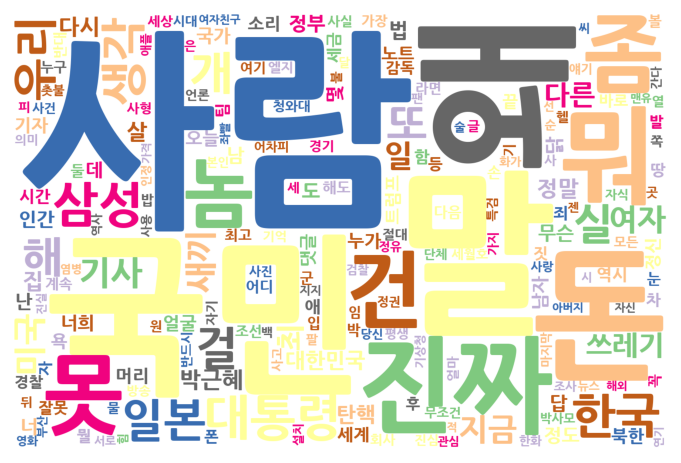

In [ ]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/NanumGothicExtraBold.ttf', 
                       background_color='white',
                       colormap = "Accent_r", 
                       width=1500, 
                       height=1000).generate_from_frequencies(count) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

- png 이미지 파일로 저장
    - 왼쪽 파일에 올라감 -> 다운로드

In [ ]:
wordcloud.to_file('wordcloud_angry.png')